In [1]:
import astropy
import lightkurve as lk
import matplotlib.pyplot as plt
import pickle
import os

In [2]:
TIC = 'TIC 66818296' #WASP-17 / TIC 66818296
search_result = lk.search_lightcurve(
        target=TIC,
        mission='TESS', author='SPOC')
lc_collection = search_result.download_all()
# lc = lc_collection.stitch(corrector_func=lambda x: x.
#                           remove_nans().normalize(unit='unscaled'))
lc = lc_collection[0]
lc = lc.normalize()
lc = lc.remove_outliers(sigma=10)


In [3]:
lc

time,flux,flux_err,timecorr,cadenceno,centroid_col,centroid_row,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,,,d,,pix,pix,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
Time,float32,float32,float32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
1628.9527366213874,9.9146342e-01,2.2294226e-03,5.7549695e-03,289074,1734.75869,254.41609,5.6552012e+03,1.2536695e+01,4.5658228e+03,5.9796586e+00,6.3341509e+03,1.4243086e+01,0,———,———,———,———,1734.75869,1.7931858e-03,254.41609,1.7716236e-03,4.0939126e-02,2.0365320e-01
1628.9541255101508,9.9583793e-01,2.2304894e-03,5.7549700e-03,289075,1734.74578,254.42646,5.6748306e+03,1.2542694e+01,4.5680073e+03,5.9771156e+00,6.3620981e+03,1.4249902e+01,0,———,———,———,———,1734.74578,1.7894373e-03,254.42646,1.7657484e-03,2.5400141e-02,2.1769401e-01
1628.955514398915,9.9091458e-01,2.2287809e-03,5.7549705e-03,289076,1734.75697,254.42326,5.6416396e+03,1.2533087e+01,4.5655005e+03,5.9784079e+00,6.3306445e+03,1.4238987e+01,0,———,———,———,———,1734.75697,1.8040523e-03,254.42326,1.7733830e-03,3.9708838e-02,2.1558438e-01
1628.9569032876798,9.9025726e-01,2.2276556e-03,5.7549709e-03,289077,1734.77388,254.40724,5.6449824e+03,1.2526758e+01,4.5653208e+03,5.9806061e+00,6.3264453e+03,1.4231798e+01,0,———,———,———,———,1734.77388,1.8003181e-03,254.40724,1.7727494e-03,5.3074531e-02,1.9718842e-01
1628.9582921764436,9.9405742e-01,2.2288344e-03,5.7549714e-03,289078,1734.75465,254.41574,5.6675269e+03,1.2533387e+01,4.5580649e+03,5.9763598e+00,6.3507231e+03,1.4239328e+01,0,———,———,———,———,1734.75465,1.7944344e-03,254.41574,1.7658967e-03,4.2726278e-02,2.0543911e-01
1628.959681065207,9.9572426e-01,2.2284959e-03,5.7549719e-03,289079,1734.73932,254.42526,5.6712891e+03,1.2531484e+01,4.5560479e+03,5.9750943e+00,6.3613721e+03,1.4237165e+01,0,———,———,———,———,1734.73932,1.7894540e-03,254.42526,1.7633970e-03,2.1659279e-02,2.1886539e-01
1628.961069953971,9.9142510e-01,2.2267138e-03,5.7549723e-03,289080,1734.75758,254.41773,5.6525649e+03,1.2521463e+01,4.5581753e+03,5.9713359e+00,6.3339062e+03,1.4225781e+01,0,———,———,———,———,1734.75758,1.7970275e-03,254.41773,1.7686322e-03,3.9847802e-02,2.0756216e-01
1628.962458842735,9.9342662e-01,2.2281376e-03,5.7549728e-03,289081,1734.75298,254.41704,5.6614937e+03,1.2529469e+01,4.5481836e+03,5.9697313e+00,6.3466934e+03,1.4234877e+01,0,———,———,———,———,1734.75298,1.7935706e-03,254.41704,1.7688903e-03,3.7096344e-02,2.0781381e-01


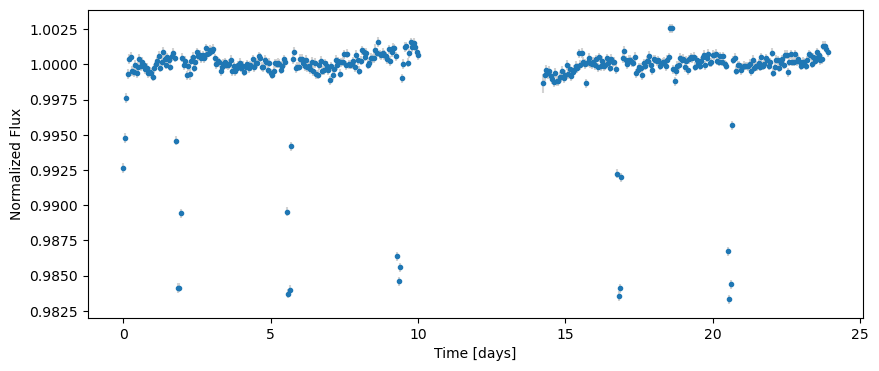

In [4]:
fig = plt.figure(figsize=(10,4))

lc_bin = lc.bin(time_bin_size = 0.05) # Default time is in days
plt.errorbar(lc_bin.time.mjd-lc_bin.time[0].mjd, lc_bin.flux, lc_bin.flux_err, fmt='.', ecolor='LightGrey')

plt.title("")
plt.xlabel('Time [days]')
plt.ylabel('Normalized Flux')
plt.show()

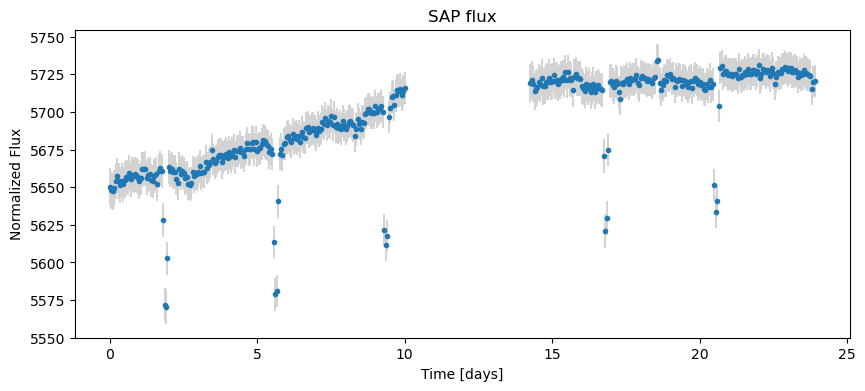

In [5]:
fig = plt.figure(figsize=(10,4))

lc_bin = lc.bin(time_bin_size = 0.05) # Default time is in days
plt.errorbar(lc_bin.time.mjd-lc_bin.time[0].mjd, lc_bin.sap_flux, lc_bin.sap_flux_err, fmt='.', ecolor='LightGrey')

plt.title("SAP flux")
plt.xlabel('Time [days]')
plt.ylabel('Normalized Flux')
plt.show()

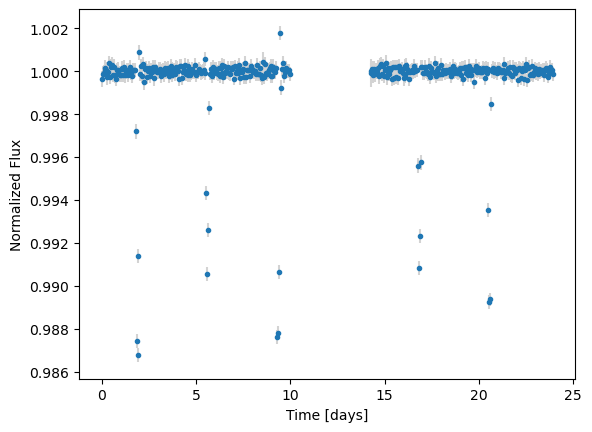

In [6]:
lc = lc.flatten()

lc_bin = lc.bin(time_bin_size = 0.05) # Default time is in days
plt.errorbar(lc_bin.time.mjd-lc_bin.time[0].mjd, lc_bin.flux, lc_bin.flux_err, fmt='.', ecolor='LightGrey')

plt.title("")
plt.xlabel('Time [days]')
plt.ylabel('Normalized Flux')
plt.show()

In [ ]:
fig = plt.figure(figsize=(10,4))

lc_bin = lc.bin(time_bin_size = 0.05) # Default time is in days
plt.errorbar(lc_bin.time.mjd-lc_bin.time[0].mjd, lc_bin.sap_flux, lc_bin.sap_flux_err, fmt='.', ecolor='LightGrey')

plt.xlim(7.0,9.0)
plt.title("SAP flux")
plt.xlabel('Time [days]')
plt.ylabel('Normalized Flux')
plt.show()